In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('train.csv')
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [4]:
temp=df['Self_Employed'].value_counts()
temp.head()



No     500
Yes     82
Name: Self_Employed, dtype: int64

In [5]:
df['Loan_Status'].value_counts()
df['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
5      Y
6      Y
7      N
8      Y
9      N
10     Y
11     Y
12     Y
13     N
14     Y
15     Y
16     Y
17     N
18     N
19     Y
20     N
21     Y
22     N
23     N
24     N
25     Y
26     Y
27     Y
28     N
29     Y
      ..
584    N
585    N
586    Y
587    Y
588    Y
589    N
590    Y
591    N
592    Y
593    Y
594    Y
595    Y
596    N
597    N
598    Y
599    Y
600    N
601    Y
602    Y
603    Y
604    Y
605    N
606    Y
607    Y
608    Y
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

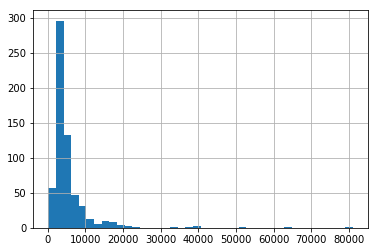

In [6]:

df['ApplicantIncome'].hist(bins=40)


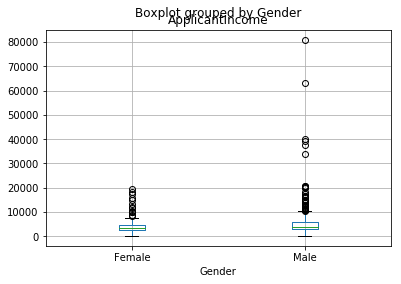

In [7]:
df.boxplot(column='ApplicantIncome', by = 'Gender')


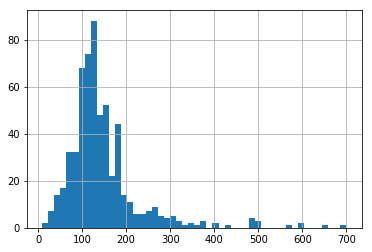

In [8]:
df['LoanAmount'].hist(bins=50)  #X-axis: the values of loan amount #Y-axis: the frequencies of different values of loan amount


In [3]:
df.apply(lambda x: sum(x.isnull()),axis=0) #to tell the missing values in each column


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.describe()



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.Self_Employed = df.Self_Employed.fillna('No')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


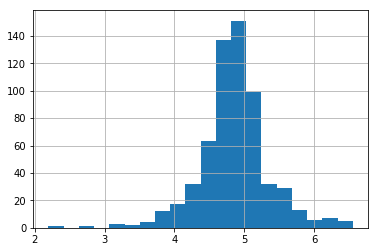

In [6]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) #log function to reduce the extreme effect in Loan amount
df['LoanAmount_log'].hist(bins=20)

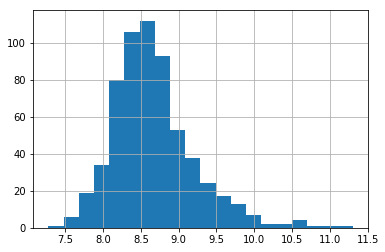

In [7]:
#to decrease the extreme values of ApplicantIncome (which can be ssen from the previous barplot), we can add CoApplicantIncome to compensate the value 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [15]:
#print(df[df["Loan_Amount_Term"].isnull()][null_columns])
#print(df['Loan_Amount_Term'])

In [8]:
md = df['Married'].value_counts(ascending=True)
md.head()
df.Married = df.Married.fillna('Yes')
df.Loan_Status = df.Loan_Status.fillna('1')
df.Dependents = df.Married.fillna('0')




In [15]:
df['Dependents'].value_counts(ascending=True)

No     213
Yes    401
Name: Dependents, dtype: int64

In [9]:
df.Gender =df.Gender.fillna('Male')
df.Credit_History = df.Credit_History.fillna('1.0')


In [17]:
 df['Dependents'].value_counts(ascending=True)



No     213
Yes    401
Name: Dependents, dtype: int64

In [19]:
df['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
5      Y
6      Y
7      N
8      Y
9      N
10     Y
11     Y
12     Y
13     N
14     Y
15     Y
16     Y
17     N
18     N
19     Y
20     N
21     Y
22     N
23     N
24     N
25     Y
26     Y
27     Y
28     N
29     Y
      ..
584    N
585    N
586    Y
587    Y
588    Y
589    N
590    Y
591    N
592    Y
593    Y
594    Y
595    Y
596    N
597    N
598    Y
599    Y
600    N
601    Y
602    Y
603    Y
604    Y
605    N
606    Y
607    Y
608    Y
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [10]:
df.isnull().any()


Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
dtype: bool

In [11]:
from sklearn.preprocessing import LabelEncoder

var_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()  #Encode labels with value between 0 and n_classes-1.
for i in var_col:
    print(i)
    df[i] = le.fit_transform(df[i]) #Fit label encoder and return encoded labels
df.dtypes

Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
LoanAmount_log       614 non-null float64
dtypes: float64(4), int64(8), object(2)
memory usage: 67.2+ KB
None


In [23]:
df['Loan_Status'].value_counts()



1    422
0    192
Name: Loan_Status, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

outcome_var = ['Loan_Status']
predictor_var = ['Credit_History','LoanAmount']


model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], test_size=0.2, random_state = 2) # 0.2 test_size means 20%
model.fit(X_train,y_train)
probs = model.predict_proba(X_test)
predictions = probs[:,1]
    

    

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))



In [14]:
with open(filename ,'rb') as f:
    loaded_model = pickle.load(f)


In [41]:
    loaded_model.predict_proba(X_test)

array([[0.92741816, 0.07258184],
       [0.83039223, 0.16960777],
       [0.18434924, 0.81565076],
       [0.14676716, 0.85323284],
       [0.23003512, 0.76996488],
       [0.14676716, 0.85323284],
       [0.21208085, 0.78791915],
       [0.16826293, 0.83173707],
       [0.22329572, 0.77670428],
       [0.23778523, 0.76221477],
       [0.23623255, 0.76376745],
       [0.2329205 , 0.7670795 ],
       [0.19135981, 0.80864019],
       [0.17518312, 0.82481688],
       [0.16826293, 0.83173707],
       [0.86888962, 0.13111038],
       [0.16826293, 0.83173707],
       [0.16340188, 0.83659812],
       [0.18071901, 0.81928099],
       [0.21939842, 0.78060158],
       [0.21893581, 0.78106419],
       [0.15829396, 0.84170604],
       [0.20100742, 0.79899258],
       [0.19219783, 0.80780217],
       [0.41229604, 0.58770396],
       [0.15472538, 0.84527462],
       [0.1536677 , 0.8463323 ],
       [0.21224576, 0.78775424],
       [0.16713101, 0.83286899],
       [0.14407962, 0.85592038],
       [0.